## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd
# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### What is the most expensive home in the dataset? (★☆☆)

In [2]:
ds.sort_values(by='price', ascending=False).iloc[0]

Unnamed: 0                                                      13111
id_realEstates                                              132042636
isNew                                                           False
realEstate_name                            engel volkers torrelodones
phone_realEstate                                          911798512.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/vi...
rooms                                                            19.0
bathrooms                                                         NaN
surface                                                           NaN
price                                                         8500000
date                                             2019-12-19T12:29:00Z
description         El Palacio de El Enebral, la finca fue propied...
address                                                   El Escorial
country                                                        España
level1              

#### What is cheapest home in the dataset? (★☆☆)

In [3]:
ds.sort_values(by='price').iloc[0]

Unnamed: 0                                                       7357
id_realEstates                                              149639033
isNew                                                           False
realEstate_name                                     viviendas para ti
phone_realEstate                                          918003243.0
url_inmueble        https://www.fotocasa.es/vivienda/madrid-capita...
rooms                                                             3.0
bathrooms                                                         2.0
surface                                                         120.0
price                                                               0
date                                             2019-12-25T01:52:00Z
description         EDIFICIO CANTO REDONDO, es un exclusivo edific...
address                                Plaza Canto Redondo, 5, Getafe
country                                                        España
level1              

#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [4]:
#biggest
ds.sort_values(by='surface', ascending=False).iloc[0]

#smallest
ds.sort_values(by='surface').iloc[0]

Unnamed: 0                                                        499
id_realEstates                                              152817874
isNew                                                           False
realEstate_name                                              toledo21
phone_realEstate                                          910757382.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/ma...
rooms                                                             1.0
bathrooms                                                         1.0
surface                                                          15.0
price                                                           85000
date                                     2019-12-28T19:04:44.6433814Z
description         ¡NO BUSQUES MÁS, YA LA HAS ENCONTRADO! . \n \n...
address                                 Calle Amparo,  Madrid Capital
country                                                        España
level1              

#### How many populations (level5) the dataset contains? (★☆☆)

In [5]:
ds['level5'].nunique()

168

#### Does the dataset contain NAs? (★☆☆)


In [6]:
ds.isnull().values.any()

True

#### Delete the NAs of the dataset, if applicable (★★☆)

In [7]:
# Drop all rows with at least 3-NaN values and reset index after drop 
# TODO: Correct
ds2=ds.dropna(thresh=2)

ds2


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [13]:
arroyolinos = ds[ds['level5'].isin(['Arroyomolinos (Madrid)'])]
arroyolinos['price'].mean()

294541.59854014596

#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

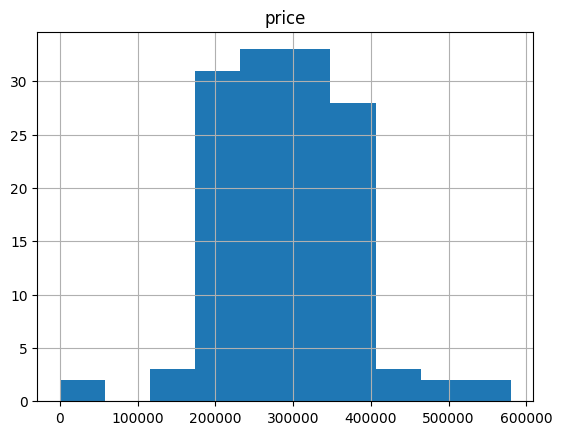

In [14]:
arroyolinos.hist('price')

What I can see is that the prices are really close to the price mean of the region. Therefore, the mean is a good indicative of 

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [15]:
belt = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
south_belt = ds[ds['level5'].isin(belt)]
south_belt

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN


#### Make a bar plot of the median of prices (★★★) 

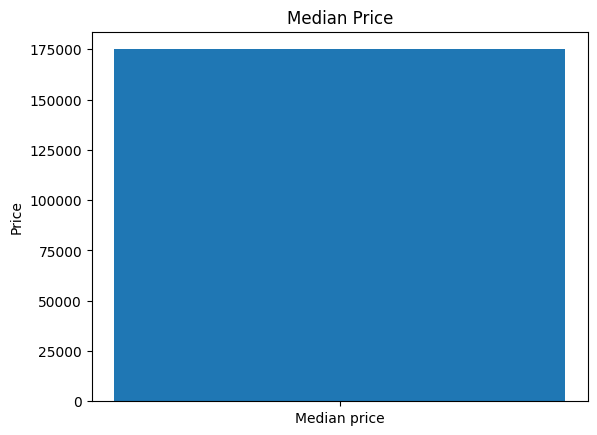

In [16]:
import matplotlib.pyplot as plt

median_price = south_belt['price'].median()

plt.bar('Median price', median_price)
plt.ylabel('Price')
plt.title('Median Price')

plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [18]:
# Calculate the sample mean
mean_price = ds['price'].mean()
mean_rooms = ds['rooms'].mean()
mean_surface_area = ds['surface'].mean()
mean_bathrooms = ds['bathrooms'].mean()

# Calculate the sample variance
var_price = ds['price'].var()
var_rooms = ds['rooms'].var()
var_surface_area = ds['surface'].var()
var_bathrooms = ds['bathrooms'].var()

print("Sample mean:")
print("Price:", mean_price)
print("Rooms:", mean_rooms)
print("Surface Area:", mean_surface_area)
print("Bathrooms:", mean_bathrooms)

print("\nSample variance:")
print("Price:", var_price)
print("Rooms:", var_rooms)
print("Surface Area:", var_surface_area)
print("Bathrooms:", var_bathrooms)

Sample mean:
Price: 477303.56641669385
Rooms: 3.2316112668535575
Surface Area: 196.91643592474264
Bathrooms: 2.150233488992662

Sample variance:
Price: 349628868677.4539
Rooms: 1.9407455379492797
Surface Area: 4764433.8520764755
Bathrooms: 1.669469222949398


#### What is the most expensive home of each population? (★★☆) 

In [19]:
ds.groupby('level5')['price'].max()

level5
 Madrid Capital          8000000
Ajalvir                   345000
Alcalá de Henares         850000
Alcobendas               8000000
Alcorcón                  950000
                          ...   
Villar del Olmo           280000
Villarejo de Salvanés     226000
Villaviciosa de Odón     1900000
Villavieja del Lozoya     260000
Zarzalejo                 199000
Name: price, Length: 168, dtype: int64

#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [8]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [9]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

#### What happens if we do the same analysis for price/m2 (★★☆) 

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

#### How many  real estate agencies the dataset contains? (★★☆) 

#### What is the population (level 5) that contains the most houses? (★★☆) 